In [1]:
import pandas as pd
import seaborn as sns


In [2]:
titanic = sns.load_dataset("titanic")


In [3]:
# Först - förstå datasetet

titanic.head()  # lämpligt för att titta på datan
                # För att veta vad de betyder - behöver gå till källan
                # och hitta förklaring

   

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()
# De som står object på är strängar i detta fall. 
# En sådan sak man kan titta på när man gör 
# Datacleaning. Om t.ex. fare varit object, hade vi velat konvertera till float.
# För att städa upp och lägga rätt datatyp. 
# Ibland har man importerat data och allt kommit in som strängar, bra att upptäcka här.
# Non-null count: Hur många värden i kolumnen är inte NaN. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.isna()       # Alla som saknar värde blir true och annars false
titanic.isna().sum() # summerar för kolumnen: 1:a true och 0 false
# I detta fall t.ex. ta bort kolumn deck helt eftersom så mkt saknas
# Eller ta bort de rader där bara 2 saknas värden saknas 


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# Antal procent missade värden
# Antal missade värden/Totalt antal värden  * 100

titanic.isna().sum() / len(titanic) *100 

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### I sådana här situationer
- Viktigt att cleana datat för att maskininlärningsalgoritmen inte ska få konstiga resultat

In [7]:
titanic.describe()
# Annat bra sätt för att få bra överblick och förstå datasetet utifrån mean och spridning.
# även bra för att hitta outliers (går även via annat typ boxplot osv)
# Statistik data och kvartiler fås
    # Om man sorterar age från lägsta till högsta höjd:
        # 25 % av raderna ner är det värdet 20.125 på age, 
        # 100 % är maxvärdet
        # 75 % av alla ombord var 38 år eller yngre
    
    # Tar bara fram data för numeriska värden


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.describe(include=["object", "category"])       # Inkluderar då bara de som har object och category som datatyp
                                                       # Category är speciell datatyp som pandas har och kan ta 
                                                            # begränsat antal värden. T.ex. bara 0 eller 1. 
                                                       # Top = "Mode", och antal av denna mode feature är freq.


,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [9]:
titanic.describe(include="all")
    # blir dock rörigt, och man får NaN på de numeriska osv för data som ej passar in.
# Object = strängar eller mixed values
# Om det är kombination av datatyper blir object, eller alla andra typer av python objekt, även om det är konstigt
                           

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# titanic.astype("object").info() # sätter alla till värden till datatype 'object'

titanic2 = titanic.astype({"fare": "object", "age":"object"}) # sätter de specifika kolumnerna till viss datatyp

# Har ingen inplace så man får ta det till ny variabel, därav kallar det för titanic2

titanic2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    object  
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    object  
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), int64(4), object(7)
memory usage: 80.7+ KB


In [11]:
# Objects kan man ändra värdet till vadsomhelst
titanic2.loc[0, "sex"] = "kille"
titanic2.head()

# Categorical går inte att ändra till vadsomhelst
# Det är förutbestämt vilka värden som kan antas på förhand 
# så jag kan bara ändra till ett av de värden man har bestämt 
# att de får ha, annars får jag felmeddelande


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,kille,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# Categorical går inte att ändra till vadsomhelst
# Det är förutbestämt vilka värden som kan antas på förhand 
# så jag kan bara ändra till ett av de värden man har bestämt 
# att de får ha, annars får jag felmeddelande

# titanic2.loc[0, "class"] = "kille" 
# titanic2.head()
# Felmeddelande p.g.a. detta

In [12]:
# Hur får man ut vilka värden man kan sätta det till?

titanic2["class"].unique() #  Visar samtliga kategorier (dessa får sättas)
# titanic2["class"].value_counts()   # Visar antal av varje kategori





['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [13]:
# Hur sätter man dessa categorical values?
# Om man t.ex. ändrar type för kolumnen 'sex' till categorical
titanic2 = titanic2.astype({"fare": "object", "age":"object", "sex": "category"}) # sätter de specifika kolumnerna till viss datatyp


# Då kommer de värden som finns att nu bli förutbestämda (categorical)
# Där ingår "kille" som vi lade till innan när den var av objects typ
titanic2["sex"].unique()


# Att ha som category finns en del fördelar.
    # Fördel: tar mindre minne, sparar bara en nyckel för varje värde som int, inte ny sträng för varje värde)
    # När man skapar kategoridatatyper kan man dels säga vilka typer av kategorier vi ska ha
    # Kan också säga att de ska vara sorterade i viss ordning.
        # T.ex. unsorted för male female
        # Men i class sorteras enligt first, second och third
        # för när vi sorterar gör den det i den ordning vi sätter och inte bokstavsordning. 


['kille', 'female', 'male']
Categories (3, object): ['female', 'kille', 'male']

### Tillbaka till denna

In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
titanic.isna().sum()

# Vad gör vi med deck som har massa null?
# Om vi hade haft en maskininlärningsalgoritm som ska hitta mönster
# Hade vi då fått nöja oss med att inte se mönster 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
titanic.drop(columns = "deck", inplace = True)
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
# Utvärderar nu NaN värden för embark_town feature.
# Vill då se vilka värden som finns samt antal
titanic["embark_town"].value_counts()


# Vad gör vi med denna?


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [18]:
# Fylla NA i "embark_town" med mode, det vanligaste
titanic["embark_town"].fillna(titanic["embark_town"].mode()[0], inplace = True)

# Alternativt: Ta bort raderna
# titanic.dropna(subset = ["embark_town"])


In [19]:
# Fylla NA i "embarked" med mode, det vanligaste
titanic["embarked"].fillna(titanic["embark_town"].mode()[0], inplace = True)


In [20]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

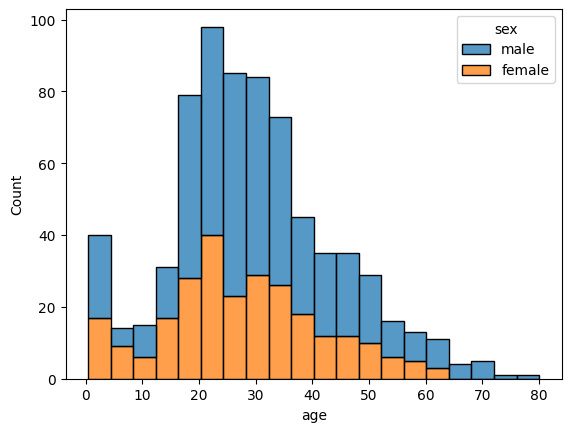

In [21]:
# När det gäller age:
# Bra att titta på fördelningen för att förstå mer
sns.histplot(x = "age", hue = "sex", multiple = "stack", data = titanic)

In [22]:
# Rimligt att fråga någon titanic expert, vad ska vi fylla?
# Anta att vi fyller i median värde för män på män och samma på kvinnor utifrån att vi sett fördelningen ovan och tycker det är rätt väg

# Median för samtliga
median_age = titanic["age"].median()
print(median_age)

# Median enbart för män
median_age_male = titanic.query("sex == 'male'")["age"].median()
print(median_age_male)

median_age_female = titanic.query("sex == 'female'")["age"].median()
print(median_age_female)


28.0
29.0
27.0


In [23]:
# Ta fram relevant Series
titanic.loc[titanic["sex"] == "male", "age"]

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: age, Length: 577, dtype: float64

In [24]:
# Fylla NaN ålder på maile med Median
titanic.loc[titanic["sex"] == "male", "age"].fillna(median_age_male)

0      22.0
4      35.0
5      29.0
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: age, Length: 577, dtype: float64

In [25]:
# Tittar på listan igen
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [26]:
# Resterande som saknas måste vara female, sätter de till det.
# Men verifiera först också, säkerställ att alla kvar är femaile

titanic["age"] = titanic["age"].fillna(median_age_female)

In [27]:
# Tittar på listan igen
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

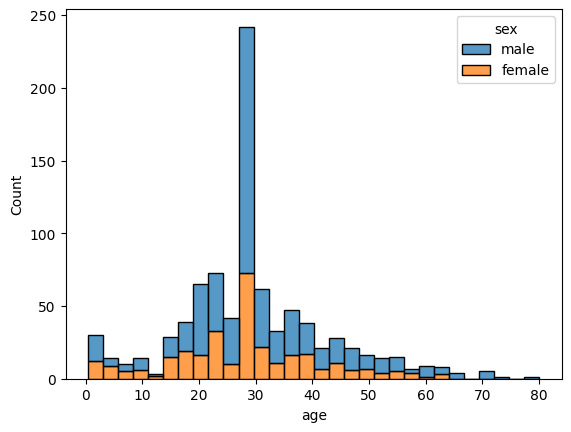

In [30]:
# Inga fler NaN värden

# Se över fördelning: Var det bästa lösningen? Eller räcker det för min applikation?
# Räcker det så behöver det inte kompliceras mer.
sns.histplot(x = "age", hue = "sex", multiple = "stack", data = titanic)